In [26]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx



import matplotlib.pyplot as plt

     ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
     --------------------------------------- 0.0/42.2 MB 660.6 kB/s eta 0:01:04
     --------------------------------------- 0.1/42.2 MB 656.4 kB/s eta 0:01:05
     --------------------------------------- 0.1/42.2 MB 655.4 kB/s eta 0:01:05
     --------------------------------------- 0.1/42.2 MB 654.9 kB/s eta 0:01:05
     --------------------------------------- 0.2/42.2 MB 657.6 kB/s eta 0:01:04
     --------------------------------------- 0.2/42.2 MB 695.5 kB/s eta 0:01:01
     --------------------------------------- 0.2/42.2 MB 689.2 kB/s eta 0:01:01
     --------------------------------------- 0.3/42.2 MB 684.6 kB/s eta 0:01:02
     --------------------------------------- 0.3/42.2 MB 708.9 kB/s eta 0:01:00
     --------------------------------------- 0.3/42.2 MB 678.3 kB/s eta 0:01:02
     --------------------------------------- 0.4/42.2 MB 719.3 kB/s eta 0:00:59
     --------------------------------------- 0.4

In [6]:
!python3 -m spacy download en_core_web_sm


Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [7]:
!python3

In [9]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 245.8 kB/s eta 0:00:52
     --------------------------------------- 0.0/12.8 MB 245.8 kB/s eta 0:00:52
     --------------------------------------- 0.1/12.8 MB 262.6 kB/s eta 0:00:49
     --------------------------------------- 0.1/12.8 MB 262.6 kB/s eta 0:00:49
     --------------------------------------- 0.1/12.8 MB 249.8 kB/s eta 0:00:51
     --------------------------------------- 0.1/12.8 MB 300.4 kB/s eta 0:00:43
     --------------------------------------- 0.1/12.8 MB 303.9 kB/s eta 0:00:42
      -------------------------------------- 0.2/12.8 MB 338.5 kB/s eta 0:00:38
      -------------------------------------- 0.2/12.8 MB 368.6 kB/s eta 

In [27]:
#load spacy english language model
NER = spacy.load("en_core_web_sm")

In [28]:
import os
#Get all book files in the data directory
all_books = [b for b in os.scandir('data') if '.txt' in b.name]

In [29]:
all_books

[<DirEntry '1 The Last Wish.txt'>,
 <DirEntry '2 The Sword of Destiny.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '8 something ends something begins.txt'>]

In [30]:
book = all_books[1]
book_text = open(book).read()
book_doc = NER(book_text)

In [31]:
#Visualize identified entities
displacy.render(book_doc[0:2000], style='ent', jupyter = True)

**Load character names**


In [32]:
#Read characters 
character_df = pd.read_csv("characters.csv")

In [33]:
#Remove brackets and text within brackets
import re
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x))
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])


In [34]:
#pd.set_option('dispaly.max_rows', None)
character_df

,Unnamed: 0,book,character,character_firstname
0,0,Category:Baptism of Fire characters,Adalia,Adalia
1,1,Category:Baptism of Fire characters,Adela,Adela
2,2,Category:Baptism of Fire characters,Aen Saevherne,Aen
3,3,Category:Baptism of Fire characters,Aevenien,Aevenien
4,4,Category:Baptism of Fire characters,Aglaïs,Aglaïs
...,...,...,...,...
1270,1270,Category:Time of Contempt characters,Yanna of Murivel,Yanna
1271,1271,Category:Time of Contempt characters,Yarpen Zigrin,Yarpen
1272,1272,Category:Time of Contempt characters,Yennefer of Vengerberg,Yennefer
1273,1273,Category:Time of Contempt characters,Yiolenta Suarez,Yiolenta


**Get named entity list per sentence**

In [35]:
sent_entity_df = []

#loop through sentences , store named entity list for each sentence 
for sent in book_doc.sents :
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities":entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [36]:
sent_entity_df

,sentence,entities
0,"(ï»¿The, Limits, of, the, Possible, \n, I, \n,...",[ï»¿The Limits of the Possible]
1,"("", It, 's, been, an, hour, and, a, quarter, s...",[an hour and a quarter]
2,"(He, 's, done, for, .)",[]
3,"("", \n, The, townsfolk, ,, huddled, together, ...",[]
4,"(A, fat, man, dressed, in, a, yellow, smock, \...",[]
...,...,...
11327,"("", \n, Yurga, saw, astonishment, in, the, eye...",[Yurga]
11328,"(He, heard, Chrysididae, 's, discreet, sobs, a...",[]
11329,"(He, knew, that, he, would, not, understand, t...",[]
11330,"(With, good, reason, :, \n, "", You, 're, more,...",[]


In [37]:
#Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list
           if ent in list(character_df.character)
           or ent in list(character_df.character_firstname)]

In [38]:
#test
filter_entity(['Geralt', 'mohammed', '2'], character_df)

['Geralt']

In [39]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

#Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len)> 0]
sent_entity_df_filtered.head(10)

,sentence,entities,character_entities
85,"(I, am, Geralt, of, Rivia, .)",[Geralt of Rivia],[Geralt of Rivia]
95,"(Is, there, anything, keeping, you, in, this, ...",[Geralt of Rivia],[Geralt of Rivia]
102,"("", \n, "", Borch, ,, "", replied, Geralt, ,, wh...","[Borch, Geralt]",[Geralt]
106,"("", \n, "", There, are, some, ,, "", Geralt, rep...",[Geralt],[Geralt]
110,"("", \n, Geralt, took, off, a, glove, and, shoo...",[Geralt],[Geralt]
140,"("", I, forgot, ,, "", Three, Jackdaws, winked, ...","[Three Jackdaws, Geralt]",[Geralt]
151,"(Geralt, loosened, his, belt, ,, removed, his,...",[Geralt],[Geralt]
157,"("", Do, the, girls, speak, the, common, langua...",[Geralt],[Geralt]
160,"(How, 's, your, soup, ,, Geralt, ?, "", \n, "", ...","[Geralt, Hmm]",[Geralt]
169,"(Yet, there, is, a, certain, principal, underl...",[Geralt],[Geralt]


In [40]:
#Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
                                                                                                          for item in x])

C:\Users\elQajjam Mohammed\AppData\Local\Temp\ipykernel_8124\2643871984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [41]:
sent_entity_df_filtered

,sentence,entities,character_entities
85,"(I, am, Geralt, of, Rivia, .)",[Geralt of Rivia],[Geralt]
95,"(Is, there, anything, keeping, you, in, this, ...",[Geralt of Rivia],[Geralt]
102,"("", \n, "", Borch, ,, "", replied, Geralt, ,, wh...","[Borch, Geralt]",[Geralt]
106,"("", \n, "", There, are, some, ,, "", Geralt, rep...",[Geralt],[Geralt]
110,"("", \n, Geralt, took, off, a, glove, and, shoo...",[Geralt],[Geralt]
...,...,...,...
11314,"(He, only, saw, black, -, gloved, hands, squee...",[Ciri],[Ciri]
11316,"(Oh, ,, Geralt, !)",[Geralt],[Geralt]
11321,"(Say, it, ,, Geralt, !)",[Geralt],[Geralt]
11322,"(Forever, !, Say, it, !, "", \n, "", Forever, ,,...","[Forever, Ciri, Geralt]","[Ciri, Geralt]"


**Create relatioships**

In [42]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [43]:
relationship_df = pd.DataFrame(relationships)

In [44]:
relationship_df

,source,target
0,Geralt,Niedamir
1,Geralt,Niedamir
2,Geralt,Niedamir
3,Niedamir,Geralt
4,Niedamir,Geralt
...,...,...
3204,Ciri,Geralt
3205,Geralt,Ciri
3206,Ciri,Geralt
3207,Ciri,Geralt


In [45]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

,source,target
0,Geralt,Niedamir
1,Geralt,Niedamir
2,Geralt,Niedamir
3,Geralt,Niedamir
4,Geralt,Niedamir
...,...,...
3204,Ciri,Geralt
3205,Ciri,Geralt
3206,Ciri,Geralt
3207,Ciri,Geralt


In [46]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()


In [47]:
relationship_df.head(10)

,source,target,value
0,Geralt,Niedamir,52
1,Eyck,Geralt,51
2,Dorregaray,Geralt,30
3,Dorregaray,Yennefer,44
4,Geralt,Yarpen,24
5,Geralt,Gyllenstiern,32
6,Boholt,Niedamir,21
7,Boholt,Geralt,39
8,Geralt,Kennet,2
9,Boholt,Kennet,8


**Graph analysis and visualization**

In [48]:
#Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df,
                          source ="source",
                          target = "target",
                          edge_attr = "value",
                          create_using = nx.Graph())

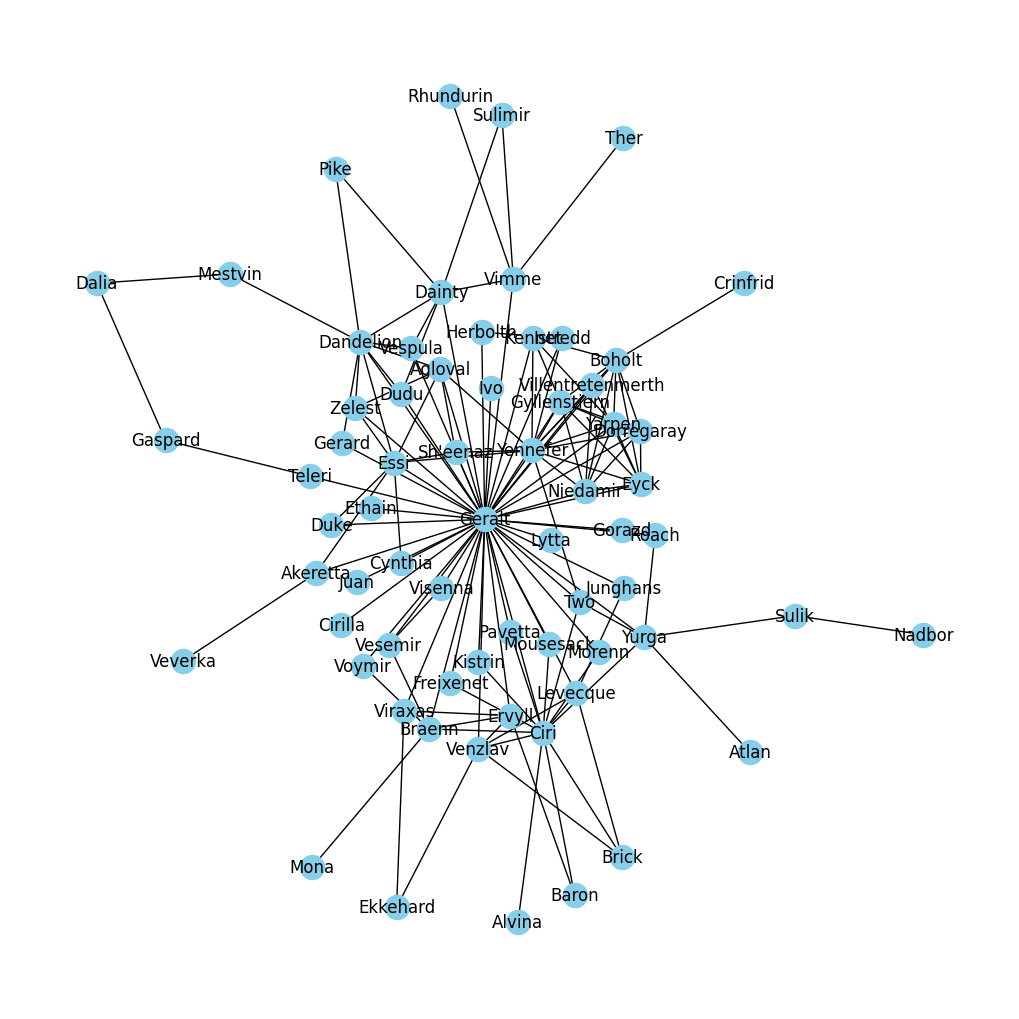

In [49]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

**With Pyvis**

In [63]:
from pyvis.network import Network
net = Network(notebook = True , width ="1000px", height= "700px", bgcolor= '#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [52]:
node_degree

{'Geralt': 49,
 'Niedamir': 8,
 'Eyck': 8,
 'Dorregaray': 6,
 'Yennefer': 14,
 'Yarpen': 7,
 'Gyllenstiern': 8,
 'Boholt': 9,
 'Kennet': 5,
 'Crinfrid': 1,
 'Villentretenmerth': 4,
 'Istredd': 3,
 'Herbolth': 2,
 'Ivo': 1,
 'Two': 4,
 'Dandelion': 10,
 'Pike': 2,
 'Dainty': 7,
 'Vespula': 3,
 'Vimme': 5,
 'Sulimir': 2,
 'Ther': 1,
 'Rhundurin': 1,
 'Dudu': 3,
 "Sh'eenaz": 4,
 'Agloval': 6,
 'Gaspard': 2,
 'Teleri': 2,
 'Dalia': 2,
 'Mestvin': 2,
 'Essi': 9,
 'Gerard': 2,
 'Zelest': 4,
 'Duke': 2,
 'Akeretta': 3,
 'Veverka': 1,
 'Ethain': 1,
 'Juan': 1,
 'Cynthia': 2,
 'Braenn': 6,
 'Ciri': 14,
 'Ervyll': 5,
 'Voymir': 2,
 'Kistrin': 2,
 'Alvina': 1,
 'Vesemir': 3,
 'Cirilla': 1,
 'Freixenet': 2,
 'Venzlav': 6,
 'Ekkehard': 2,
 'Viraxas': 3,
 'Morenn': 2,
 'Mona': 1,
 'Pavetta': 2,
 'Baron': 2,
 'Junghans': 2,
 'Brick': 3,
 'Levecque': 5,
 'Mousesack': 2,
 'Yurga': 6,
 'Visenna': 2,
 'Atlan': 1,
 'Lytta': 1,
 'Gorazd': 1,
 'Roach': 2,
 'Nadbor': 1,
 'Sulik': 2}

**The most important characters**

In [58]:
#Degree centrality
degree_df = nx.degree_centrality(G)
degree_dict


{'Geralt': 0.7424242424242424,
 'Niedamir': 0.12121212121212122,
 'Eyck': 0.12121212121212122,
 'Dorregaray': 0.09090909090909091,
 'Yennefer': 0.21212121212121213,
 'Yarpen': 0.10606060606060606,
 'Gyllenstiern': 0.12121212121212122,
 'Boholt': 0.13636363636363635,
 'Kennet': 0.07575757575757576,
 'Crinfrid': 0.015151515151515152,
 'Villentretenmerth': 0.06060606060606061,
 'Istredd': 0.045454545454545456,
 'Herbolth': 0.030303030303030304,
 'Ivo': 0.015151515151515152,
 'Two': 0.06060606060606061,
 'Dandelion': 0.15151515151515152,
 'Pike': 0.030303030303030304,
 'Dainty': 0.10606060606060606,
 'Vespula': 0.045454545454545456,
 'Vimme': 0.07575757575757576,
 'Sulimir': 0.030303030303030304,
 'Ther': 0.015151515151515152,
 'Rhundurin': 0.015151515151515152,
 'Dudu': 0.045454545454545456,
 "Sh'eenaz": 0.06060606060606061,
 'Agloval': 0.09090909090909091,
 'Gaspard': 0.030303030303030304,
 'Teleri': 0.030303030303030304,
 'Dalia': 0.030303030303030304,
 'Mestvin': 0.030303030303030304,


<AxesSubplot: >

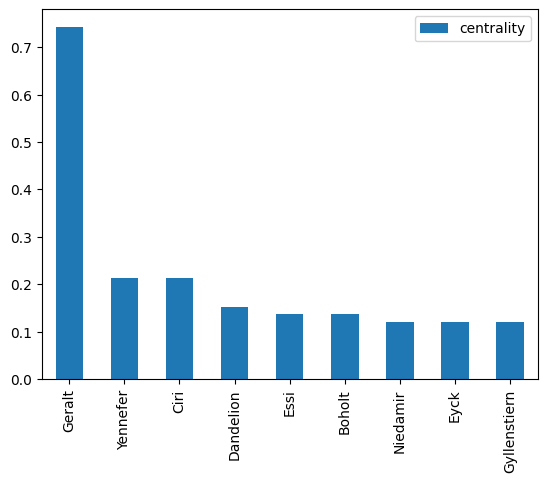

In [59]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
#Plot top 10 nodes
degree_df.sort_values('centrality', ascending = False)[0:9].plot(kind="bar")

<AxesSubplot: >

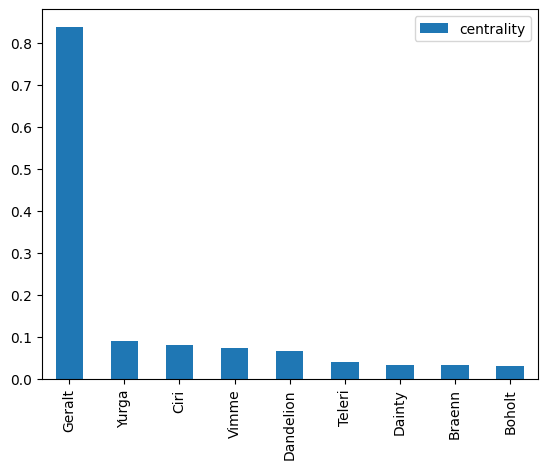

In [60]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot: >

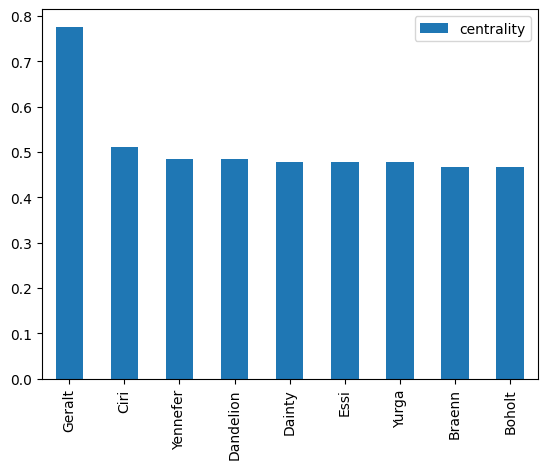

In [61]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [62]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

**Community detection**

In [65]:
import community as community_louvain

In [66]:
communities = community_louvain.best_partition(G)

In [67]:
communities

{'Geralt': 0,
 'Niedamir': 1,
 'Eyck': 1,
 'Dorregaray': 1,
 'Yennefer': 1,
 'Yarpen': 1,
 'Gyllenstiern': 1,
 'Boholt': 1,
 'Kennet': 1,
 'Crinfrid': 1,
 'Villentretenmerth': 1,
 'Istredd': 0,
 'Herbolth': 0,
 'Ivo': 0,
 'Two': 3,
 'Dandelion': 5,
 'Pike': 5,
 'Dainty': 5,
 'Vespula': 5,
 'Vimme': 5,
 'Sulimir': 5,
 'Ther': 5,
 'Rhundurin': 5,
 'Dudu': 5,
 "Sh'eenaz": 0,
 'Agloval': 0,
 'Gaspard': 6,
 'Teleri': 6,
 'Dalia': 6,
 'Mestvin': 6,
 'Essi': 0,
 'Gerard': 5,
 'Zelest': 0,
 'Duke': 0,
 'Akeretta': 0,
 'Veverka': 0,
 'Ethain': 0,
 'Juan': 0,
 'Cynthia': 0,
 'Braenn': 4,
 'Ciri': 2,
 'Ervyll': 2,
 'Voymir': 4,
 'Kistrin': 2,
 'Alvina': 2,
 'Vesemir': 4,
 'Cirilla': 0,
 'Freixenet': 2,
 'Venzlav': 2,
 'Ekkehard': 2,
 'Viraxas': 2,
 'Morenn': 2,
 'Mona': 4,
 'Pavetta': 2,
 'Baron': 2,
 'Junghans': 2,
 'Brick': 2,
 'Levecque': 2,
 'Mousesack': 2,
 'Yurga': 3,
 'Visenna': 4,
 'Atlan': 3,
 'Lytta': 0,
 'Gorazd': 0,
 'Roach': 3,
 'Nadbor': 3,
 'Sulik': 3}

In [68]:
nx.set_node_attributes(G, communities, 'group')

In [70]:
com_net = Network(notebook = True, width="1000px", height="900px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("witcher_communities.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
